# Goal : Save the Safada (or the ambiguous ones)
***
## I. Loading the dataframes
## II. Transform the features : PCA
## III. Clustering
## IV. Scan the results
***


In [3]:
import pandas as pd 
import os 
import json

path_df = "/media/concha-eloko/Linux/depolymerase_building"

# The embeddings dataframe
df_embeddings = pd.read_csv(f"{path_df}/embeddings.proteins.v2.csv", header = None)
df_embeddings

# The index to protein id dataframe
df_seq_index = pd.read_csv(f"{path_df}/df_sequences.index.v2.csv", sep = "\t", header = None)

# The id to annotation dico
dico_id_annotation = json.load(open(f"{path_df}/proteinID_annotation.v2.json"))
annotations_1 = []
for _, row in df_seq_index.iterrows() :
    annotations_1.append(dico_id_annotation[row[1]])
df_seq_index["annotation"] = annotations_1  
df_seq_index_final = df_seq_index.drop_duplicates(subset=[0] , keep = "first")
df_seq_index_final.columns = ["index", "protein_id","sequence","annotation"]

X = df_embeddings.iloc[:, 1:-1]
index = df_embeddings.iloc[:, 0]

In [44]:
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281
0,1009,0.008734,-0.011932,-0.033933,-0.013995,-0.020876,-0.011965,0.042843,-0.124740,0.034137,...,-0.072059,-0.011539,0.015036,0.020495,-0.098677,0.102415,-0.041627,0.008928,0.095930,NaN
1,4905,0.042258,0.023316,-0.042922,0.025434,-0.072349,-0.016528,-0.024879,-0.092157,0.008760,...,-0.047182,-0.014637,0.043724,0.045681,-0.083603,0.058811,-0.074511,0.035296,0.115120,NaN
2,1487,0.015499,0.006887,-0.036882,0.024653,-0.063820,-0.054818,-0.022974,-0.154953,0.021071,...,-0.040027,0.003677,-0.014759,-0.016642,-0.069932,0.114651,-0.044850,0.024084,0.073573,NaN
3,5070,-0.002898,-0.042779,-0.039436,-0.024450,-0.019969,-0.021439,0.027164,-0.092931,0.071283,...,-0.023316,-0.078693,0.001606,-0.006281,0.044922,0.089993,0.062029,0.037642,0.078838,NaN
4,1138,0.007824,-0.018516,-0.030261,0.000144,-0.038056,0.065659,-0.059406,-0.020858,-0.012239,...,-0.040974,-0.063597,0.084183,0.017864,0.089446,0.096507,-0.023180,-0.057165,-0.020677,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,822,-0.025435,0.001249,-0.031343,0.073552,-0.059288,0.012151,0.017552,-0.110742,0.014510,...,-0.040766,0.020807,0.140887,0.048890,-0.107259,0.128814,-0.074134,-0.043366,0.133816,NaN
6812,6005,0.006375,0.070814,-0.006187,-0.008755,-0.060994,0.018730,-0.014622,-0.138266,0.058897,...,-0.015401,0.033131,0.058552,-0.018401,-0.008952,0.069521,-0.048576,0.050632,0.000249,NaN
6813,5938,-0.009460,0.002632,-0.060908,0.090122,-0.153431,0.037715,0.029996,-0.212695,-0.002617,...,-0.022245,0.066190,0.064869,-0.035397,-0.033090,0.078399,-0.044476,-0.051897,0.077827,NaN
6814,1272,-0.047766,-0.014384,-0.021619,-0.009721,-0.077374,-0.009484,0.029884,-0.147185,0.038989,...,-0.010853,0.124980,0.011596,0.010316,-0.012137,0.088252,-0.096923,-0.005257,0.100708,NaN


In [7]:
df_seq_index_final[df_seq_index_final["index"] == 1479]["sequence"].values[0]

'MNKAHIDINWENYPSDETPLNERNLNKMDGSIDIIDDRVITLDTTKATKAEVATLVADVTFEESTGIITITKKNGSKITIDTQMEKIAINFDYNPITQQIILTLIDGTKQYIDLSALITQYEFHDSDTVAFYIDKDGKVSAIVKEGSIEEKHLEPNYLAKIKVEVAKAESSQQAAAKSEINAKASENAAKASETAAKTSETNAKASETAAAKSATAAAISETNAKASETSASQSAATATSEAASASQSASTAIDKATIATQKATEIIGKAESAAESAAKAQSYAVGGTGSREGEDSDNAKYYYQQAKDVSEGLKGGLQPHGTVAFADLPALADVSTGWMFNISDEFTTTDDFKEGAGNVIPAGANIYKTSDEKWDVLAGTPVTGIKGVNEDSFRRGNVELTAENVGAVATGGDTAENTATFTSSDVADGSASAWTTVSKLSSGEKHSSIFAKVSQMFKNVRYLYKMLGTTDISKIGNGTCTGAISSLNSSLANHLPLSGGTMTGTIIGQHKLPGSTASDSNGMVLGVQTTGNTGIFNGNGDGNGAGVANLIIKSWYGVGFVDGCSGQGMTVGIDCRSGNITCNSITIRNVGSVTDLLNSKLSTSASCNKNWNWSGKNETPAWIWGGSDGTNMYVYNPTYILVQGIRNRVTNRAMTITNDNHVRTYESNGVGMNGAISLGSANYRFSQLYVTSSSISTSDKNYKDDIKSLTDKHLQFFMKLQPVSFLFKDGTSGRTHIGFIAQDVEQAMSECGLTDLDFAGFCKDQKIDSKLVDGEEVNEPILDENGNPEYIYSLRYEEFIALNTYVIQELWKRVDAVEKENIETKNQIKSMQQDIAELKKIRA'

In [14]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy as sp
import subprocess
from scipy.spatial import distance
from tqdm import tqdm
from collections import Counter
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/home/concha-eloko/.local/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


***
## II. PCA

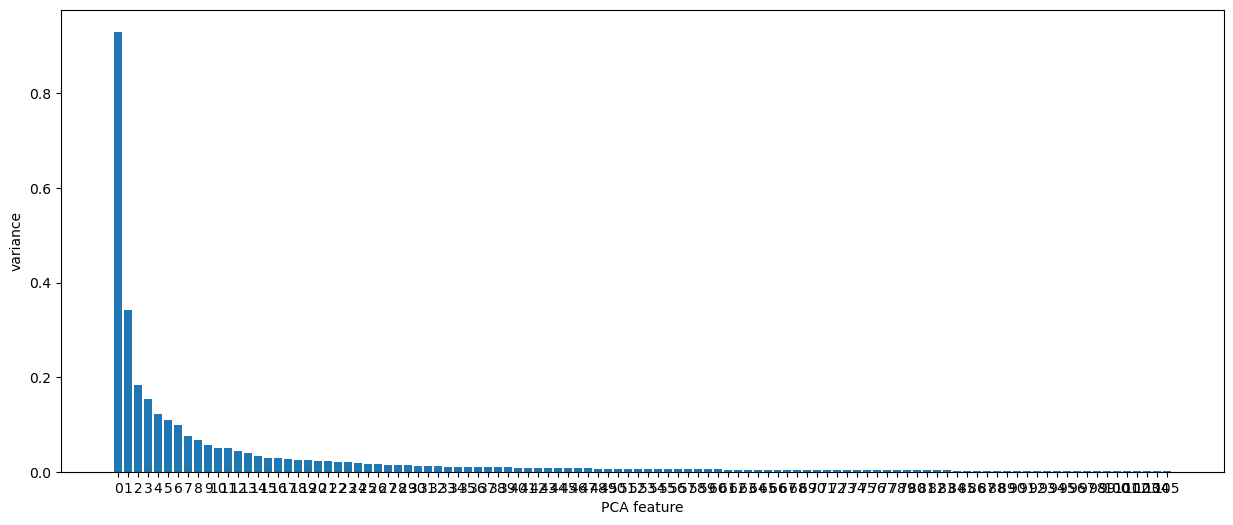

In [45]:
pca = PCA(.95)
pca_scaled_x = pca.fit_transform(X)


    # Writing the figures :
features = range(pca.n_components_)
plt.figure(figsize=(15, 6))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
#plt.savefig(f"{path_fig}/PCA.features.jpeg")
plt.show()

*** 
## III. Affinity propagation

In [46]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(damping=0.90, preference=None, random_state=123, max_iter=1000,verbose=True).fit(pca_scaled_x)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
n_clusters_

Converged after 192 iterations.


341

***
## IV. Scanning the results

> Plot the results

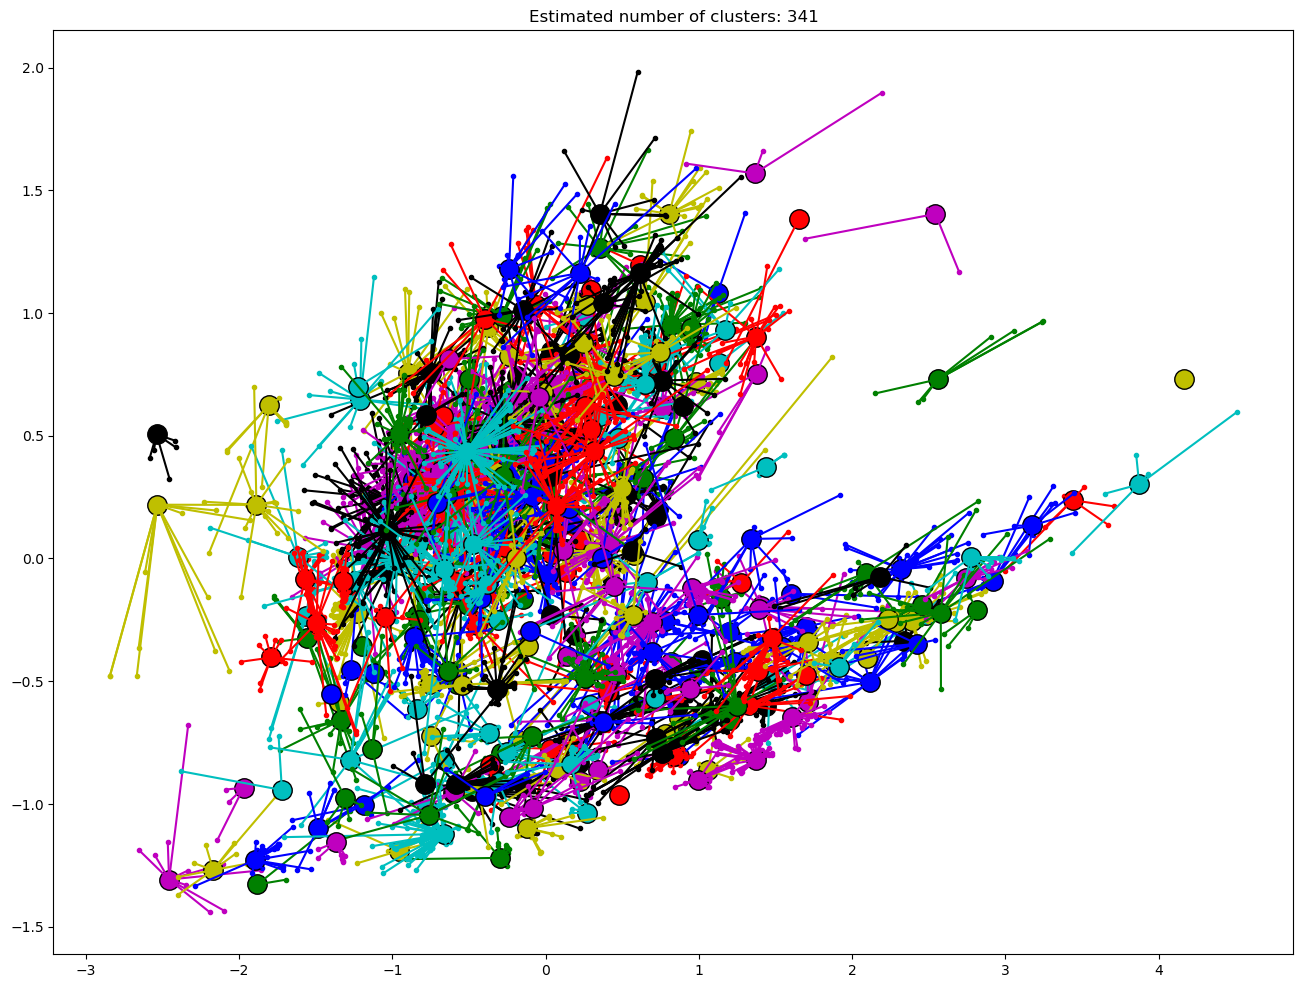

In [47]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(figsize=(16, 12))
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = pca_scaled_x[cluster_centers_indices[k]]
    plt.plot(pca_scaled_x[class_members, 0], pca_scaled_x[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in pca_scaled_x[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
#plt.savefig(f"{path_fig}/AffPropagation.small.features.jpeg")
plt.show()

> Create the databases

In [61]:
list_types = []
for index__ in tqdm(index) :
    annotation = df_seq_index_final[df_seq_index_final["index"] == index__]["annotation"].values[0]
    list_types.append((index__ ,annotation))
    
cluster_dico={}
for i_label, cluster in enumerate(labels):
    if cluster not in cluster_dico :
        k_types=[]
        k_types.append(list_types[i_label])
        cluster_dico[cluster]=k_types
    else :
        cluster_dico[cluster].append(list_types[i_label])

100%|█████████████████████████████████| 6816/6816 [00:03<00:00, 2061.25it/s]


In [62]:
cluster_dic




{79: [(1009, 'fibritin neck whisker'),
  (6145, 'fibritin neck whisker'),
  (2087, 'tail needle protein'),
  (5442, 'hypothetical protein'),
  (3226, 'fibritin neck whisker'),
  (768, 'fibritin neck whisker'),
  (803, 'fibritin neck whisker'),
  (4599, 'glycerophosphoryl diester phosphodiesterase'),
  (3454, 'fibritin neck whisker'),
  (5908, 'fibritin neck whisker'),
  (5285, 'hypothetical protein'),
  (2647, 'fibritin neck whisker'),
  (5953, 'fibritin neck whisker'),
  (6020, 'fibritin neck whisker'),
  (590, 'fibritin neck whisker'),
  (6638, 'hypothetical protein'),
  (4213, 'fibritin neck whisker'),
  (4104, 'tail fiber protein')],
 223: [(4905, 'tail fiber protein'),
  (2716, 'tail fiber protein'),
  (4431, 'tail fiber protein'),
  (1418, 'tail fiber protein'),
  (5379, 'tail fiber protein'),
  (2083, 'tail fiber protein'),
  (6649, 'tail fiber protein'),
  (6009, 'tail fiber protein'),
  (2674, 'tail fiber protein'),
  (1479, 'kinase'),
  (4763, 'tail fiber protein'),
  (5595, 